# In Class Notebook, Week 12

You can always access the notebook URL: https://github.com/UIUC-iSchool-DataViz/is445_oauoag_fall2022/blob/master/week12/inClass_week12.ipynb 

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [5]:
myJekyllSaveDir = '/Users/jnaiman/jnaiman.github.io/assets/json/'

## 1. Finish up Mobility Dashboard with fully local data

In [2]:
mobility_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/mobility.csv'

Reminder for making a plot with Altair using a data url:

In [3]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q",bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [4]:
dashboard

alt.HConcatChart(...)

In [6]:
dashboard.save(myJekyllSaveDir+'dashboard_all_in_altair.json')

Now, actually with locally hosted data:

In [7]:
mobility = pd.read_csv(mobility_url)

In [8]:
mobility.head()

ID            Name  Mobility State  Population  Urban  Black  Seg_racial  \
0  100    Johnson City  0.062199    TN      576081      1  0.021       0.090   
1  200      Morristown  0.053652    TN      227816      1  0.020       0.093   
2  301  Middlesborough  0.072635    TN       66708      0  0.015       0.064   
3  302       Knoxville  0.056281    TN      727600      1  0.056       0.210   
4  401   Winston-Salem  0.044801    NC      493180      1  0.174       0.262   

   Seg_income  Seg_poverty  ...  Migration_out  Foreign_born  Social_capital  \
0       0.035        0.030  ...          0.005         0.012          -0.298   
1       0.026        0.028  ...          0.014         0.023          -0.767   
2       0.024        0.015  ...          0.012         0.007          -1.270   
3       0.092        0.084  ...          0.014         0.020          -0.222   
4       0.072        0.061  ...          0.019         0.053          -0.018   

   Religious  Violent_crime  Single_mothers  Divorced  Married  Longitude  \
0      0.514          0.001           0.190     0.110    0.601 -82.436386   
1      0.544          0.002           0.185     0.116    0.613 -83.407249   
2      0.668          0.001           0.211     0.113    0.590 -83.535332   
3      0.602          0.001           0.206     0.114    0.575 -84.242790   
4      0.488          0.003           0.220     0.092    0.586 -80.505333   

    Latitude  
0  36.470371  
1  36.096539  
2  36.551540  
3  35.952259  
4  36.081276  

[5 rows x 43 columns]

In [9]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q",bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard_local = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [10]:
dashboard_local

alt.HConcatChart(...)

In [11]:
dashboard_local.save(myJekyllSaveDir+'dashboard_all_in_altair_local.json')

In [14]:
mobility_subset = mobility[['State', 'Student_teacher_ratio', 'Mobility']]

In [15]:
mobility_subset.head()

State  Student_teacher_ratio  Mobility
0    TN                    NaN  0.062199
1    TN                    NaN  0.053652
2    TN                   15.1  0.072635
3    TN                    NaN  0.056281
4    NC                   15.4  0.044801

In [16]:
brush = alt.selection_interval(encodings=['x','y'])

rect_alt = alt.Chart(mobility_subset).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q",bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_selection(
    brush
)

hist_alt = alt.Chart(mobility_subset).mark_bar().encode(
    alt.X("Mobility:Q",bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

dashboard_subset = rect_alt.properties(width=300) | hist_alt.properties(width=300)

In [17]:
dashboard_subset.save(myJekyllSaveDir+'dashboard_all_in_altair_subset.json')

Take away: if using local data, make sure you have the "minimum dataframe" to pass to Altair.

## 2. Altair with buildings dataset

In [18]:
buildings_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv'
buildings = pd.read_csv(buildings_url)

In [19]:
buildings.head()

Agency Name  \
0  Department of Natural Resources   
1  Department of Natural Resources   
2  Department of Natural Resources   
3  Department of Natural Resources   
4  Department of Natural Resources   

                                     Location Name             Address  \
0  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
1  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
2  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
3  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
4  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   

      City  Zip code  County  Congress Dist Congressional Full Name  Rep Dist  \
0  Astoria     61501  Fulton             17            Cheri Bustos        93   
1  Astoria     61501  Fulton             17            Cheri Bustos        93   
2  Astoria     61501  Fulton             17            Cheri Bustos        93   
3  Astoria     61501  Fulton             17            Cheri Bustos        93   
4  Astoria     61501  Fulton             17            Cheri Bustos        93   

       Rep Full Name  ...  Bldg Status Year Acquired Year Constructed  \
0  Hammond Norine K.  ...       In Use          1975             1975   
1  Hammond Norine K.  ...       In Use          2004             2004   
2  Hammond Norine K.  ...       In Use          2004             2004   
3  Hammond Norine K.  ...       In Use          2004             2004   
4  Hammond Norine K.  ...       In Use          2004             2004   

   Square Footage  Total Floors  Floors Above Grade  Floors Below Grade  \
0             144             1                   1                   0   
1             144             1                   1                   0   
2             144             1                   1                   0   
3             144             1                   1                   0   
4             144             1                   1                   0   

   Usage Description  Usage Description 2 Usage Description 3  
0            Unusual              Unusual        Not provided  
1            Unusual              Unusual        Not provided  
2            Unusual              Unusual        Not provided  
3            Unusual              Unusual        Not provided  
4            Unusual              Unusual        Not provided  

[5 rows x 22 columns]

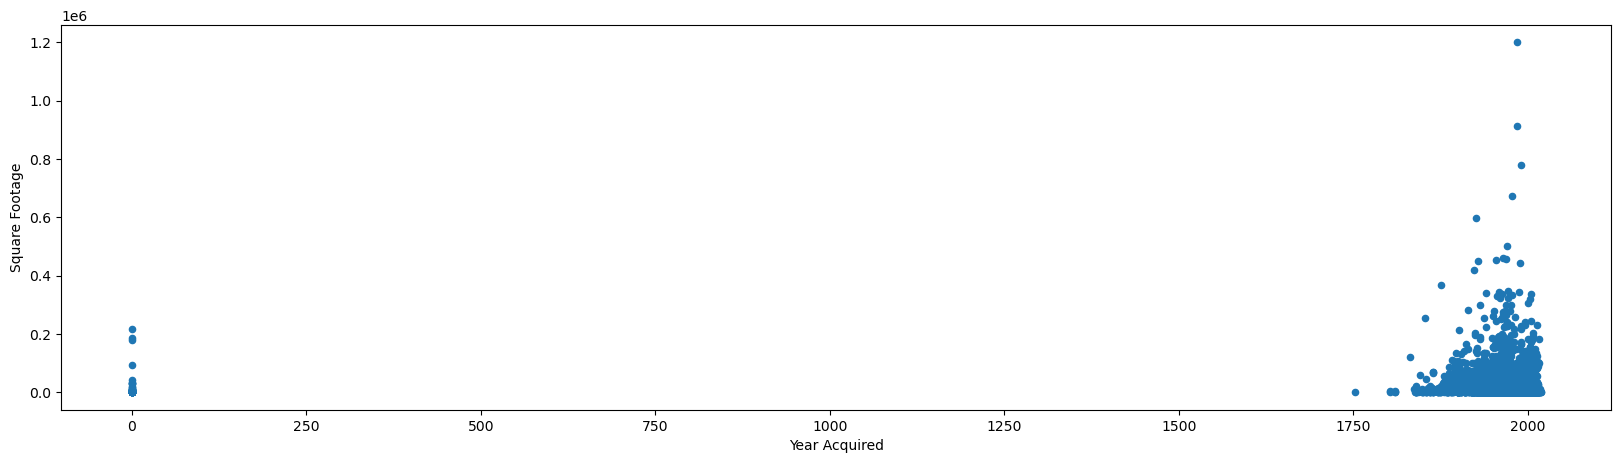

In [20]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

In [21]:
buildings.loc[buildings['Year Acquired']==0, 'Year Acquired'] = np.nan

In [22]:
buildings.loc[buildings['Square Footage']==0, 'Square Footage'] = np.nan

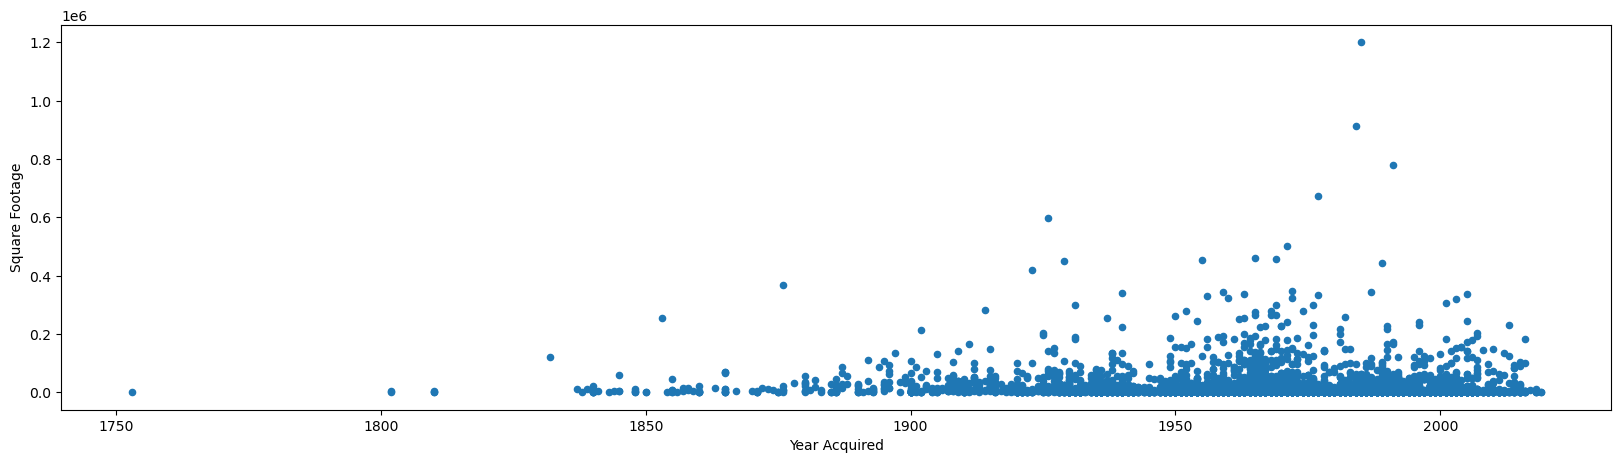

In [23]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5), kind='scatter')
plt.show()

In [24]:
stats = buildings.groupby('Year Acquired')["Square Footage"].describe()

In [25]:
stats

count           mean           std       min       25%  \
Year Acquired                                                           
1753.0           1.0    1200.000000           NaN    1200.0    1200.0   
1802.0           2.0    2220.000000   1943.129435     846.0    1533.0   
1810.0           3.0    1344.333333   1809.945948     216.0     300.5   
1832.0           1.0  120000.000000           NaN  120000.0  120000.0   
1837.0           1.0   10302.000000           NaN   10302.0   10302.0   
...              ...            ...           ...       ...       ...   
2015.0          20.0   15254.650000  29153.085290     144.0     696.0   
2016.0          10.0   30483.900000  61864.180491    1152.0    2464.0   
2017.0           1.0    6720.000000           NaN    6720.0    6720.0   
2018.0           4.0    4290.000000   5153.644342    1455.0    1455.0   
2019.0           2.0     760.000000      0.000000     760.0     760.0   

                    50%        75%       max  
Year Acquired                                 
1753.0           1200.0    1200.00    1200.0  
1802.0           2220.0    2907.00    3594.0  
1810.0            385.0    1908.50    3432.0  
1832.0         120000.0  120000.00  120000.0  
1837.0          10302.0   10302.00   10302.0  
...                 ...        ...       ...  
2015.0           3152.0   10590.25  105000.0  
2016.0           3352.5    3793.00  184000.0  
2017.0           6720.0    6720.00    6720.0  
2018.0           1852.5    4687.50   12000.0  
2019.0            760.0     760.00     760.0  

[171 rows x 8 columns]

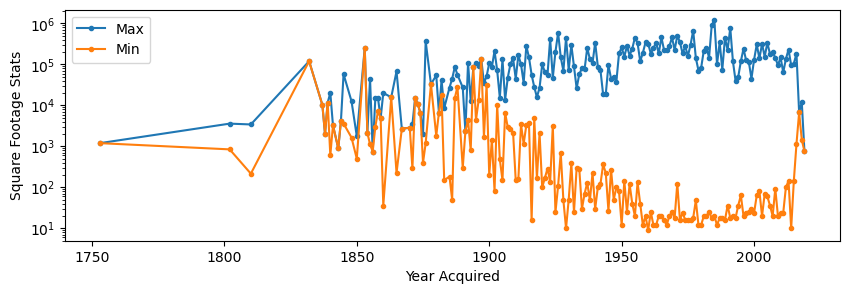

In [27]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(stats['max'], marker='.', label='Max')
ax.plot(stats['min'], marker='.', label='Min')
ax.set_xlabel('Year Acquired')
ax.set_ylabel('Square Footage Stats')
ax.set_yscale('log')
ax.legend()
plt.show()

In [30]:
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

In [31]:
stats

count           mean           std       min       25%  \
Year Acquired                                                           
1753.0           1.0    1200.000000           NaN    1200.0    1200.0   
1802.0           2.0    2220.000000   1943.129435     846.0    1533.0   
1810.0           3.0    1344.333333   1809.945948     216.0     300.5   
1832.0           1.0  120000.000000           NaN  120000.0  120000.0   
1837.0           1.0   10302.000000           NaN   10302.0   10302.0   
...              ...            ...           ...       ...       ...   
2015.0          20.0   15254.650000  29153.085290     144.0     696.0   
2016.0          10.0   30483.900000  61864.180491    1152.0    2464.0   
2017.0           1.0    6720.000000           NaN    6720.0    6720.0   
2018.0           4.0    4290.000000   5153.644342    1455.0    1455.0   
2019.0           2.0     760.000000      0.000000     760.0     760.0   

                    50%        75%       max  
Year Acquired                                 
1753.0           1200.0    1200.00    1200.0  
1802.0           2220.0    2907.00    3594.0  
1810.0            385.0    1908.50    3432.0  
1832.0         120000.0  120000.00  120000.0  
1837.0          10302.0   10302.00   10302.0  
...                 ...        ...       ...  
2015.0           3152.0   10590.25  105000.0  
2016.0           3352.5    3793.00  184000.0  
2017.0           6720.0    6720.00    6720.0  
2018.0           1852.5    4687.50   12000.0  
2019.0            760.0     760.00     760.0  

[171 rows x 8 columns]

In [32]:
stats.reset_index()

Year Acquired  count           mean           std       min       25%  \
0           1753.0    1.0    1200.000000           NaN    1200.0    1200.0   
1           1802.0    2.0    2220.000000   1943.129435     846.0    1533.0   
2           1810.0    3.0    1344.333333   1809.945948     216.0     300.5   
3           1832.0    1.0  120000.000000           NaN  120000.0  120000.0   
4           1837.0    1.0   10302.000000           NaN   10302.0   10302.0   
..             ...    ...            ...           ...       ...       ...   
166         2015.0   20.0   15254.650000  29153.085290     144.0     696.0   
167         2016.0   10.0   30483.900000  61864.180491    1152.0    2464.0   
168         2017.0    1.0    6720.000000           NaN    6720.0    6720.0   
169         2018.0    4.0    4290.000000   5153.644342    1455.0    1455.0   
170         2019.0    2.0     760.000000      0.000000     760.0     760.0   

          50%        75%       max  
0      1200.0    1200.00    1200.0  
1      2220.0    2907.00    3594.0  
2       385.0    1908.50    3432.0  
3    120000.0  120000.00  120000.0  
4     10302.0   10302.00   10302.0  
..        ...        ...       ...  
166    3152.0   10590.25  105000.0  
167    3352.5    3793.00  184000.0  
168    6720.0    6720.00    6720.0  
169    1852.5    4687.50   12000.0  
170     760.0     760.00     760.0  

[171 rows x 9 columns]

In [33]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:Q"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [34]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [35]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [36]:
stats.index

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

In [37]:
stats.index = pd.to_datetime(stats.index.astype('int'),format='%Y')

In [39]:
stats.index

DatetimeIndex(['1753-01-01', '1802-01-01', '1810-01-01', '1832-01-01',
               '1837-01-01', '1838-01-01', '1839-01-01', '1840-01-01',
               '1841-01-01', '1843-01-01',
               ...
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year Acquired', length=171, freq=None)

In [40]:
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

## Multiline plots with layers

In [42]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X("Year Acquired:T")
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='orange').encode(y='min:Q')
)

lines

alt.LayerChart(...)

In [43]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X("Year Acquired:T")
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
    ),
    lines.mark_line(color='orange').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
)

lines

alt.LayerChart(...)

In [45]:
lines.properties(width='container').save(myJekyllSaveDir+'buildings_sqft.json')

In [46]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X("Year Acquired:T")
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
    ),
    lines.mark_line(color='orange').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
).interactive() # just added this at the end!

lines

alt.LayerChart(...)

In [47]:
lines.properties(width='container').save(myJekyllSaveDir+'buildings_sqft_panzoom.json')

Better formatted data for Altair -- `melt` operation in pandas.

In [48]:
stats.reset_index()

Year Acquired  count           mean           std       min       25%  \
0      1753-01-01    1.0    1200.000000           NaN    1200.0    1200.0   
1      1802-01-01    2.0    2220.000000   1943.129435     846.0    1533.0   
2      1810-01-01    3.0    1344.333333   1809.945948     216.0     300.5   
3      1832-01-01    1.0  120000.000000           NaN  120000.0  120000.0   
4      1837-01-01    1.0   10302.000000           NaN   10302.0   10302.0   
..            ...    ...            ...           ...       ...       ...   
166    2015-01-01   20.0   15254.650000  29153.085290     144.0     696.0   
167    2016-01-01   10.0   30483.900000  61864.180491    1152.0    2464.0   
168    2017-01-01    1.0    6720.000000           NaN    6720.0    6720.0   
169    2018-01-01    4.0    4290.000000   5153.644342    1455.0    1455.0   
170    2019-01-01    2.0     760.000000      0.000000     760.0     760.0   

          50%        75%       max  
0      1200.0    1200.00    1200.0  
1      2220.0    2907.00    3594.0  
2       385.0    1908.50    3432.0  
3    120000.0  120000.00  120000.0  
4     10302.0   10302.00   10302.0  
..        ...        ...       ...  
166    3152.0   10590.25  105000.0  
167    3352.5    3793.00  184000.0  
168    6720.0    6720.00    6720.0  
169    1852.5    4687.50   12000.0  
170     760.0     760.00     760.0  

[171 rows x 9 columns]

In [50]:
melt = stats.reset_index().melt('Year Acquired', # "melting" along what our x-axis will be
                        var_name = 'Statistic', value_name='value')
melt

Year Acquired Statistic     value
0       1753-01-01     count       1.0
1       1802-01-01     count       2.0
2       1810-01-01     count       3.0
3       1832-01-01     count       1.0
4       1837-01-01     count       1.0
...            ...       ...       ...
1363    2015-01-01       max  105000.0
1364    2016-01-01       max  184000.0
1365    2017-01-01       max    6720.0
1366    2018-01-01       max   12000.0
1367    2019-01-01       max     760.0

[1368 rows x 3 columns]

In [52]:
line = alt.Chart(melt).mark_line().encode(
    alt.Y('value:Q', scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [53]:
melt['value'].min()

0.0

In [54]:
melt.loc[melt['value']==0,'value'] = np.nan

In [55]:
line = alt.Chart(melt).mark_line().encode(
    alt.Y('value:Q', scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [56]:
dropdown = alt.binding_select(options=['50%', 'min', 'max', 'mean'], name='Statistic')

In [57]:
dropdown

BindRadioSelect({
  input: 'select',
  name: 'Statistic',
  options: ['50%', 'min', 'max', 'mean']
})

In [58]:
selection = alt.selection_single(fields=['Statistic'],bind=dropdown)

In [59]:
color = alt.condition(selection, # what the condition is based on
                     alt.Color('Statistic:N'), # if condition is TRUE
                     alt.value('lightgray')) # if condition is FALSE

In [60]:
line = alt.Chart(melt).mark_line().encode(
    alt.Y('value:Q', scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color
).add_selection(
    selection
)
line

alt.Chart(...)

In [61]:
dropdown = alt.binding_select(options=['50%', 'min', 'max', 'mean'], name='Statistic')
selection = alt.selection_single(fields=['Statistic'],bind=dropdown)

color = alt.condition(selection, # what the condition is based on
                     alt.Color('Statistic:N'), # if condition is TRUE
                     alt.value('lightgray')) # if condition is FALSE
opacity = alt.condition(selection, alt.value(1.0), alt.value(0.25))

line = alt.Chart(melt).mark_line().encode(
    alt.Y('value:Q', scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color,
    opacity=opacity
).add_selection(
    selection
)
line

alt.Chart(...)

In [62]:
line.properties(width='container').save(myJekyllSaveDir+'buildings_stats_dropdown.json')